In [3]:
from glob import glob
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import matplotlib.pyplot as plt

#Import Model Packages 
from sklearn.cluster import KMeans

In [4]:
path="D:\\data\\aksam\\FM\\fs\\"

In [38]:
docs=glob(path+"**\\*.html",recursive=True)

In [39]:
len(docs)

2573

In [40]:
folder=[d.split("\\")[-2] for d in docs]

In [41]:
df=pd.DataFrame([docs,folder]).T
df.columns=['path','folder']

In [42]:
df.head()

,path,folder
0,D:\data\aksam\FM\fs\Balance Sheets\18320959_3....,Balance Sheets
1,D:\data\aksam\FM\fs\Balance Sheets\18391125_2....,Balance Sheets
2,D:\data\aksam\FM\fs\Balance Sheets\18442877_5....,Balance Sheets
3,D:\data\aksam\FM\fs\Balance Sheets\18445487_2....,Balance Sheets
4,D:\data\aksam\FM\fs\Balance Sheets\18445494_3....,Balance Sheets


In [45]:
cm = sns.light_palette("green", as_cmap=True)

pd.DataFrame(df.iloc[:,-1].value_counts()).style.background_gradient(cmap=cm)

,count
folder,
Others,1236
Notes,702
Income Statement,317
Balance Sheets,282
Cash Flow,36


In [11]:
def html_txt(d):
    df=pd.read_html(d)[0].fillna(0)
    txt=df.to_string().lower()
    txt=re.sub(r'[^a-z\s]', '', txt)
    txt=re.sub(r'\s+', ' ', txt).strip()
    return txt

In [12]:
df['text']=[html_txt(d) for d in df['path']]

In [13]:
df.head(2)

,path,folder,text
0,D:\data\aksam\FM\fs\Balance Sheets\18320959_3....,Balance Sheets,in lacs in lacs in lacs in lacs standalone sta...
1,D:\data\aksam\FM\fs\Balance Sheets\18391125_2....,Balance Sheets,consolidated consolidated standalone standalon...


In [14]:
df.tail(2)

,path,folder,text
2571,D:\data\aksam\FM\fs\Others\19213523_4.html,Others,particulars quarter ended quarter ended quarte...
2572,D:\data\aksam\FM\fs\Others\19213523_5.html,Others,particulars quarter ended quarter ended year e...


In [28]:
from nltk import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords

In [29]:
import nltk
nltk.download('punkt_tab')
stop_words=stopwords.words('english')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
def fin_metrics(x):
    corp=str(x.tolist()).lower() #string + lower case
    corp=re.sub('[^a-z]+',' ',corp).strip()
    tokens=word_tokenize(corp)
    words=[t for t in tokens if t not in stop_words]
    freq=FreqDist(w for w in words)
    return freq

In [30]:
fd=fin_metrics(df['text'])

In [33]:
from PIL import Image
mask=np.array(Image.open('cloud2.PNG'))

Text(0.5, 1.0, 'Financial Statements')

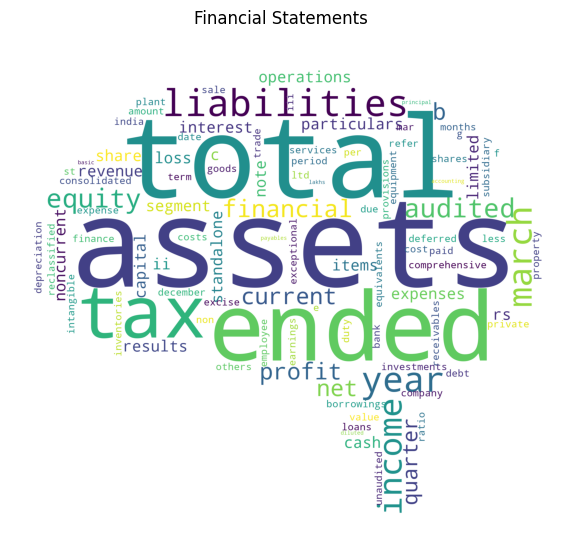

In [36]:
plt.subplots(figsize=(7,7),dpi=100)
wc=WordCloud(background_color='white',mask=mask,max_words=100,scale=4).generate_from_frequencies(fd)
plt.imshow(wc)
plt.axis('off')
plt.title("Financial Statements")

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import WordNetLemmatizer
from nltk import word_tokenize

In [27]:
# class LemmaTokenizer(object):
#     def __init__(self):
#         self.wnl = WordNetLemmatizer()
#     def __call__(self, doc):
#         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [29]:
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3),stop_words='english')
x=tfidf.fit_transform(df['text'].tolist())

In [31]:
X=pd.DataFrame(x.toarray(),columns=tfidf.get_feature_names_out())
X.shape

(2573, 5000)

In [32]:
from sklearn.decomposition import NMF

In [53]:
nmf=NMF(n_components=50)
W=nmf.fit_transform(X) #Basis vector

In [54]:
H = nmf.components_ #Coefficient matrix

In [59]:
# Identify important features
important_features = []
for component in H:
    top_features_idx = component.argsort()[-5:]  # Top 3 features per component
    important_features.extend(top_features_idx)

In [60]:
H.shape

(50, 5000)

In [61]:
# Get unique important features
feature_names=X.columns
important_features = list(set(important_features))
selected_feature_names = [feature_names[i] for i in important_features]
#print("Selected Features:", selected_feature_names)

In [62]:
len(selected_feature_names)

234

In [64]:
x=X[selected_feature_names]
x.shape

(2573, 234)

In [65]:
x.head(2)

,exchange,board,segment revenue,date,access,date date,excise,long,excise duty,long term,...,note total,total,limited subsidiary,eur,bided,number,block,obligation,block gross block,loans advances
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078852,0.0,0.08138,...,0.0,0.105234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.121035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(x),columns = x.columns, index = x.index)

In [69]:
#Fit with k-means
k_means = KMeans(n_clusters=5)
k_means.fit(X1)

KMeans(n_clusters=5)

In [70]:
centroids, assignments, inertia = k_means.cluster_centers_, k_means.labels_, k_means.inertia_

In [73]:
#Extracting labels 
target_labels = k_means.predict(X1)
target_labels

array([3, 3, 3, ..., 2, 2, 2], shape=(2573,), dtype=int32)

Text(0.5, 1.0, 'Elbow Method - Optimal Number of Clusters')

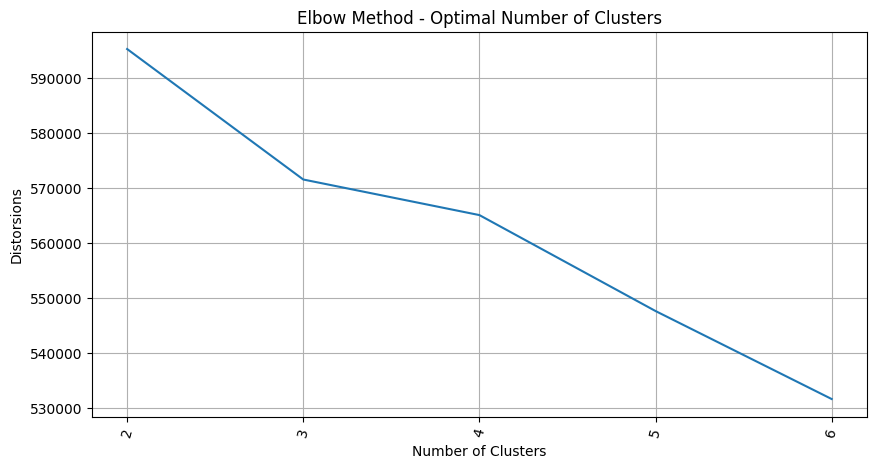

In [89]:
distorsions = []
max_loop=7
for k in range(2, max_loop):
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(X1)
    distorsions.append(kmeans_test.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Distorsions")
plt.title("Elbow Method - Optimal Number of Clusters")

Text(0.5, 1.0, 'Average Silhouette Width - Optimal Number of Clusters')

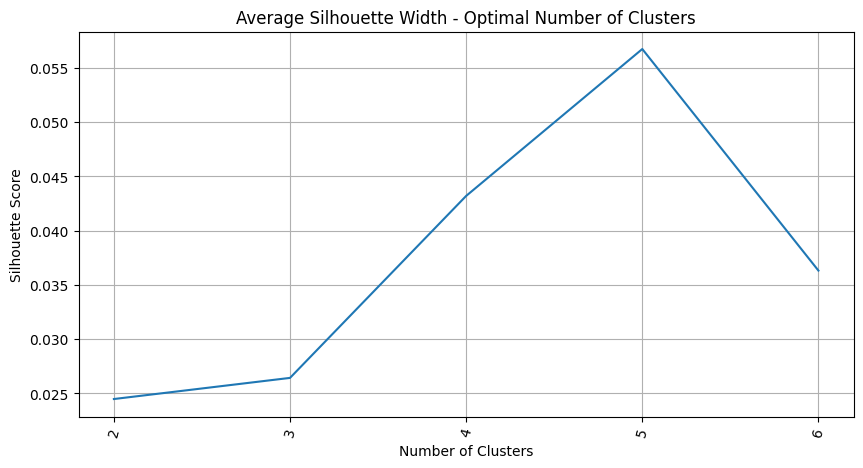

In [90]:
from sklearn import metrics
silhouette_score = []
for k in range(2, max_loop):
        kmeans_test = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans_test.fit(X1)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans_test.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Average Silhouette Width - Optimal Number of Clusters")

In [91]:
df['label']=target_labels